In [2]:
import pandas as pd
import os

In [6]:
transactions_file_path = r"C:\Users\DELL\Downloads\cleaned_transactions_data (1).csv"
products_file_path = r"C:\Users\DELL\Downloads\cleaned_products_data (1).csv"
customers_file_path = r"C:\Users\DELL\Downloads\cleaned_customers_data (1).csv"

In [10]:
transactions_df = pd.read_csv(transactions_file_path)
products_df = pd.read_csv(products_file_path)
customers_df = pd.read_csv(customers_file_path)

In [12]:
print("Transactions DataFrame:")
print(transactions_df.head())

print("Products DataFrame:")
print(products_df.head())

print("Customers DataFrame:")
print(customers_df.head())

Transactions DataFrame:
   Unnamed: 0  Transaction_ID  Company_ID  Product_ID  Quantity  \
0         0.0             1.0        88.0         6.0      11.0   
1         1.0             2.0        29.0        19.0      16.0   
2         2.0          5005.0        28.0        18.0       6.0   
3         3.0             4.0        85.0        12.0      12.0   
4         4.0             5.0        47.0         3.0       8.0   

  Transaction_Date  Product_Price  Total_Cost  Recency  Purchase_Frequency  \
0       2024-03-26  194379.147964   1075200.0    216.0                82.0   
1              NaN   97930.993380   1428000.0    730.5                69.0   
2              NaN  126095.547778    940800.0    730.5                74.0   
3              NaN  131297.783516   1008000.0    730.5                89.0   
4              NaN   99575.609634    705600.0    730.5                60.0   

   Total_Spending  
0     128878400.0  
1     121996000.0  
2     126022400.0  
3     126061600.0  
4   

In [14]:
print("Missing values in transactions dataset:")
print(transactions_df.isnull().sum())

print("Missing values in products dataset:")
print(products_df.isnull().sum())

print("Missing values in customers dataset:")
print(customers_df.isnull().sum())

Missing values in transactions dataset:
Unnamed: 0               0
Transaction_ID           0
Company_ID               0
Product_ID               0
Quantity                 0
Transaction_Date      7480
Product_Price            0
Total_Cost               0
Recency                  0
Purchase_Frequency       0
Total_Spending           0
dtype: int64
Missing values in products dataset:
Product_ID       0
Product_Name     0
Product_Price    0
Price_Range      0
dtype: int64
Missing values in customers dataset:
Company_ID                0
Company_Name              0
Company_Profit            0
Address                   0
Profitability_Category    0
Region                    0
dtype: int64


In [16]:

transactions_df['Product_ID'] = transactions_df['Product_ID'].astype(str)
products_df['Product_ID'] = products_df['Product_ID'].astype(str)
transactions_df['Company_ID'] = transactions_df['Company_ID'].astype(str)
customers_df['Company_ID'] = customers_df['Company_ID'].astype(str)

In [18]:
print("Data types of transactions dataset:")
print(transactions_df.dtypes)

print("Data types of products dataset:")
print(products_df.dtypes)

print("Data types of customers dataset:")
print(customers_df.dtypes)

Data types of transactions dataset:
Unnamed: 0            float64
Transaction_ID        float64
Company_ID             object
Product_ID             object
Quantity              float64
Transaction_Date       object
Product_Price         float64
Total_Cost            float64
Recency               float64
Purchase_Frequency    float64
Total_Spending        float64
dtype: object
Data types of products dataset:
Product_ID        object
Product_Name      object
Product_Price    float64
Price_Range       object
dtype: object
Data types of customers dataset:
Company_ID                 object
Company_Name               object
Company_Profit            float64
Address                    object
Profitability_Category     object
Region                     object
dtype: object


In [20]:
transactions_df['Transaction_Date'] = pd.to_datetime(transactions_df['Transaction_Date'])

In [22]:
recency_df = transactions_df.groupby('Company_ID')['Transaction_Date'].max().reset_index()
recency_df['Recency'] = (transactions_df['Transaction_Date'].max() - recency_df['Transaction_Date']).dt.days

In [24]:
frequency_df = transactions_df.groupby('Company_ID')['Transaction_ID'].count().reset_index()
frequency_df.rename(columns={'Transaction_ID': 'Frequency'}, inplace=True)

In [26]:
monetary_df = transactions_df.groupby('Company_ID')['Total_Cost'].sum().reset_index()
monetary_df.rename(columns={'Total_Cost': 'Monetary'}, inplace=True)

In [28]:
rfm_df = pd.merge(recency_df, frequency_df, on='Company_ID')
rfm_df = pd.merge(rfm_df, monetary_df, on='Company_ID')

In [30]:
print("RFM Features:")
print(rfm_df.head())

RFM Features:
  Company_ID Transaction_Date  Recency  Frequency     Monetary
0        1.0       2024-07-10      110         70   94847200.0
1       10.0       2024-09-17       41         93  118686400.0
2      100.0       2024-10-16       12         84  120097600.0
3       11.0       2024-09-05       53         81  121290400.0
4       12.0       2024-08-13       76         94  136001600.0


In [32]:
customers_df = pd.merge(customers_df, rfm_df[['Company_ID', 'Recency', 'Frequency', 'Monetary']], on='Company_ID', how='left')

In [34]:
print("Updated Customer DataFrame with RFM Features:")
print(customers_df.head())

Updated Customer DataFrame with RFM Features:
  Company_ID          Company_Name  Company_Profit  \
0        1.0  Tech  Enterprises  1         80701.0   
1        2.0   Global  Partners  2         80511.0   
2        3.0  Quantum Associates 3        110664.0   
3        4.0       Prime Network 4         75301.5   
4        5.0    Elite  Ventures  5         69427.0   

                                             Address Profitability_Category  \
0             EDSA, Barangay 606, Pasig, Philippines                 Medium   
1  Commonwealth Ave, Barangay 789, Taguig, Philip...                 Medium   
2       Roxas Blvd, Barangay 505, Pasig, Philippines                   High   
3  Alabang-Zapote Rd, Barangay 202, Taguig, Phili...                 Medium   
4    Ayala Avenue, Barangay 101, Makati, Philippines                 Medium   

          Region  Recency  Frequency     Monetary  
0   Barangay 606    110.0       70.0   94847200.0  
1   Barangay 789     23.0       86.0  123418400.0 

In [36]:
product_features_df = transactions_df.groupby('Product_ID').agg(
    average_price=('Product_Price', 'mean'),
    total_sales=('Total_Cost', 'sum'),
    transaction_count=('Transaction_ID', 'count')
).reset_index()

In [38]:
print("Product Features:")
print(product_features_df.head())

Product Features:
  Product_ID  average_price   total_sales  transaction_count
0        1.0  138842.947224  6.374760e+08                454
1       10.0  120540.637724  1.836671e+09               1460
2       11.0  154205.139036  7.944608e+08                474
3       12.0   88303.355629  4.126080e+08                438
4       13.0  188633.557373  8.914920e+08                440


In [40]:
transactions_df = pd.merge(transactions_df, product_features_df[['Product_ID', 'average_price', 'total_sales', 'transaction_count']], on='Product_ID', how='left')


In [42]:
print("Updated Transactions DataFrame with Product Features:")
print(transactions_df.head())

Updated Transactions DataFrame with Product Features:
   Unnamed: 0  Transaction_ID Company_ID Product_ID  Quantity  \
0         0.0             1.0       88.0        6.0      11.0   
1         1.0             2.0       29.0       19.0      16.0   
2         2.0          5005.0       28.0       18.0       6.0   
3         3.0             4.0       85.0       12.0      12.0   
4         4.0             5.0       47.0        3.0       8.0   

  Transaction_Date  Product_Price  Total_Cost  Recency  Purchase_Frequency  \
0       2024-03-26  194379.147964   1075200.0    216.0                82.0   
1              NaT   97930.993380   1428000.0    730.5                69.0   
2              NaT  126095.547778    940800.0    730.5                74.0   
3              NaT  131297.783516   1008000.0    730.5                89.0   
4              NaT   99575.609634    705600.0    730.5                60.0   

   Total_Spending  average_price  total_sales  transaction_count  
0     128878400.0  

In [46]:
merged_df = transactions_df.merge(products_df, on='Product_ID')

In [48]:
merged_df = merged_df.merge(customers_df, on='Company_ID')

In [50]:
print(merged_df.isnull().sum())

Unnamed: 0                   0
Transaction_ID               0
Company_ID                   0
Product_ID                   0
Quantity                     0
Transaction_Date          6199
Product_Price_x              0
Total_Cost                   0
Recency_x                    0
Purchase_Frequency           0
Total_Spending               0
average_price                0
total_sales                  0
transaction_count            0
Product_Name                 0
Product_Price_y              0
Price_Range                  0
Company_Name                 0
Company_Profit               0
Address                      0
Profitability_Category       0
Region                       0
Recency_y                    0
Frequency                    0
Monetary                     0
dtype: int64


In [54]:
merged_df.drop(columns=['Recency_x', 'Product_Price_x', 'Product_Price_y'], inplace=True)

In [56]:
merged_df.rename(columns={'Recency_y': 'Recency', 'Product_Price_y': 'Product_Price'}, inplace=True)

In [58]:
print(merged_df.isnull().sum())

Unnamed: 0                   0
Transaction_ID               0
Company_ID                   0
Product_ID                   0
Quantity                     0
Transaction_Date          6199
Total_Cost                   0
Purchase_Frequency           0
Total_Spending               0
average_price                0
total_sales                  0
transaction_count            0
Product_Name                 0
Price_Range                  0
Company_Name                 0
Company_Profit               0
Address                      0
Profitability_Category       0
Region                       0
Recency                      0
Frequency                    0
Monetary                     0
dtype: int64


In [62]:
X = merged_df[['Recency', 'Frequency', 'Monetary', 'Company_Profit', 'average_price', 'total_sales', 'transaction_count', 'Quantity']]
y = merged_df['Total_Spending']

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [70]:
y_pred = rf_model.predict(X_test)

#  model's performance
from sklearn.metrics import mean_squared_error, r2_score

#  Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

#  R-squared (R2) score
r2 = r2_score(y_test, y_pred)

# evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 48559553597.17656
R-squared: 0.9997900107676474


In [90]:
# Ensure 'Transaction_Date' is in datetime format
merged_df['Transaction_Date'] = pd.to_datetime(merged_df['Transaction_Date'])

# Filter data for the last six months
today = pd.to_datetime('today')
six_months_ago = today - pd.DateOffset(months=6)
filtered_df = merged_df[merged_df['Transaction_Date'] >= six_months_ago]

In [94]:
# Use .loc[] to avoid the warning
filtered_df.loc[:, 'month'] = filtered_df['Transaction_Date'].dt.month
filtered_df.loc[:, 'day_of_week'] = filtered_df['Transaction_Date'].dt.dayofweek
filtered_df.loc[:, 'lag_1'] = filtered_df['Total_Spending'].shift(1)
filtered_df.loc[:, 'rolling_avg'] = filtered_df['Total_Spending'].rolling(window=3).mean()


In [96]:
# Define features and target
X = filtered_df[['month', 'day_of_week', 'lag_1', 'rolling_avg']]
y = filtered_df['Total_Spending']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [100]:
# Create a new dataset for the next 6 months
import numpy as np

# Create a date range for the next 6 months

future_dates = pd.date_range(today, periods=6, freq='MS')


# Create a DataFrame for future predictions
future_df = pd.DataFrame({
    'month': future_dates.month,
    'day_of_week': future_dates.dayofweek,
    'lag_1': [filtered_df['Total_Spending'].iloc[-1]] * 6,  # Assume last sales as lag value for simplicity
    'rolling_avg': [filtered_df['Total_Spending'].rolling(window=3).mean().iloc[-1]] * 6
})

# Predict future sales
future_sales = model.predict(future_df)


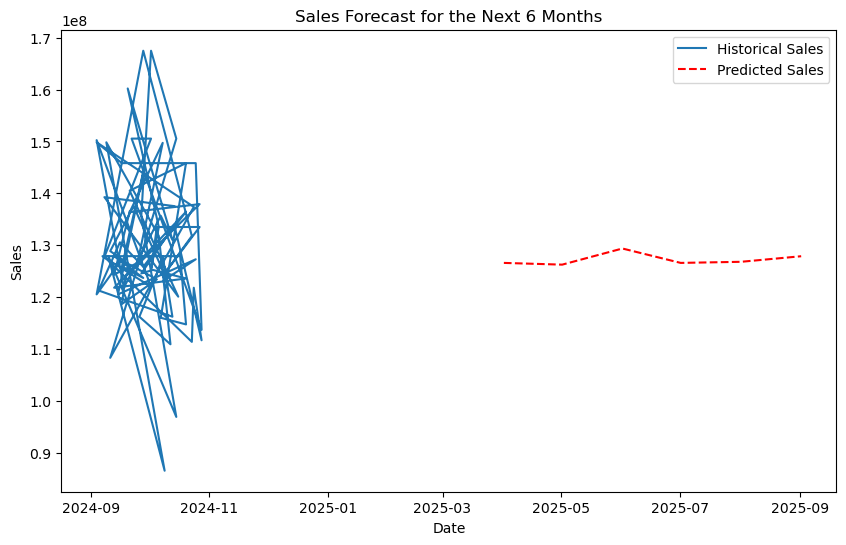

In [102]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Transaction_Date'], filtered_df['Total_Spending'], label='Historical Sales')
plt.plot(future_dates, future_sales, label='Predicted Sales', linestyle='--', color='red')

plt.title('Sales Forecast for the Next 6 Months')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

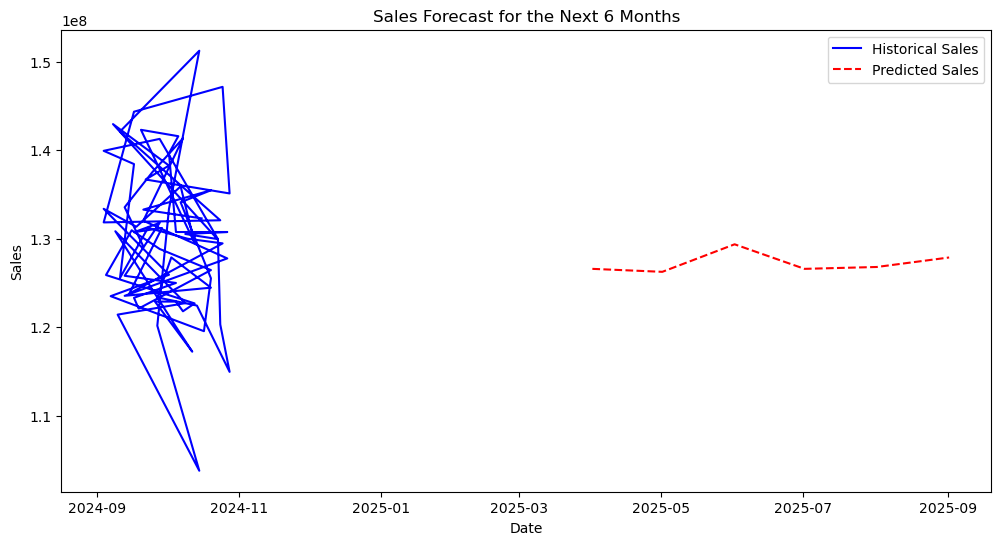

In [104]:
# Apply rolling average for smoothing historical sales data (window size = 3, you can adjust this)
smoothed_historical_sales = filtered_df['Total_Spending'].rolling(window=3).mean()

# Plot both smoothed historical sales and predicted sales
plt.figure(figsize=(12,6))

# Plot smoothed historical sales
plt.plot(filtered_df['Transaction_Date'], smoothed_historical_sales, label='Historical Sales', color='blue')

# Plot predicted sales
plt.plot(future_dates, future_sales, label='Predicted Sales', linestyle='--', color='red')

# Labels and title
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast for the Next 6 Months')

# Show legend
plt.legend()

# Show the plot
plt.show()
